In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  #por defecto las figuras se displayan 10 pulgadas de ancho y 8 de alto

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import pickle

Modelos Base

In [ ]:
df_iq1 = pd.read_csv('iq1_final_a.csv',sep=',')
#df_iq2 = pd.read_csv('iq2_final_l.csv',sep=',')
#df_iq3 = pd.read_csv('iq3_final_l.csv',sep=',')

In [ ]:
df_p1 = pd.read_csv('p1_final_l.csv',sep=',')
df_p2 = pd.read_csv('p2_final_l.csv',sep=',')
df_p3 = pd.read_csv('p3_final_l.csv',sep=',')
df_p4 = pd.read_csv('p4_final_l.csv',sep=',')

In [ ]:
df_q1 = pd.read_csv('q1_final_l.csv',sep=',')
df_q2 = pd.read_csv('q2_final_l.csv',sep=',')
df_q3 = pd.read_csv('q3_final_l.csv',sep=',')
df_q4 = pd.read_csv('q4_final_l.csv',sep=',')
df_q5 = pd.read_csv('q5_final_l.csv',sep=',')

#### IQAir

In [ ]:
#Para el test se tomarán 7 días de data (672 registros) 

In [ ]:
array = df_iq1.values
X = array[:,2:6]
y = array[:,1]

In [ ]:
test_size = 672/df_iq1.shape[0]
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 2850 ejemplos. Validation: 672 ejemplos


In [ ]:
#ExtraTrees
#Tomar los dos o tres mejores hacer la optimización
## Timepo de procesamiento para elegir el modelo
algos = []
algos.append(('RandomForest', RandomForestRegressor(n_estimators=100,n_jobs=-1 )))
algos.append(('LinearRegression', LinearRegression(n_jobs=-1 )))
algos.append(('KNeighborsRegressor', KNeighborsRegressor(n_jobs=-1 )))
algos.append(('ExtraTrees', ExtraTreesRegressor(n_estimators=100)))
algos.append(('GradientBoosting', GradientBoostingRegressor(n_estimators=100 )))

In [ ]:
# Evaluamos cada algoritmo de Ensamble en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

RandomForest: -5.968440935980748 (1.1662355752751448)
LinearRegression: -10.268308133354173 (0.9950222418499339)
KNeighborsRegressor: -6.504236338066465 (1.3530209631547838)
ExtraTrees: -5.84462406789949 (1.0699185311042254)
GradientBoosting: -6.361344808297423 (1.2259046553586976)


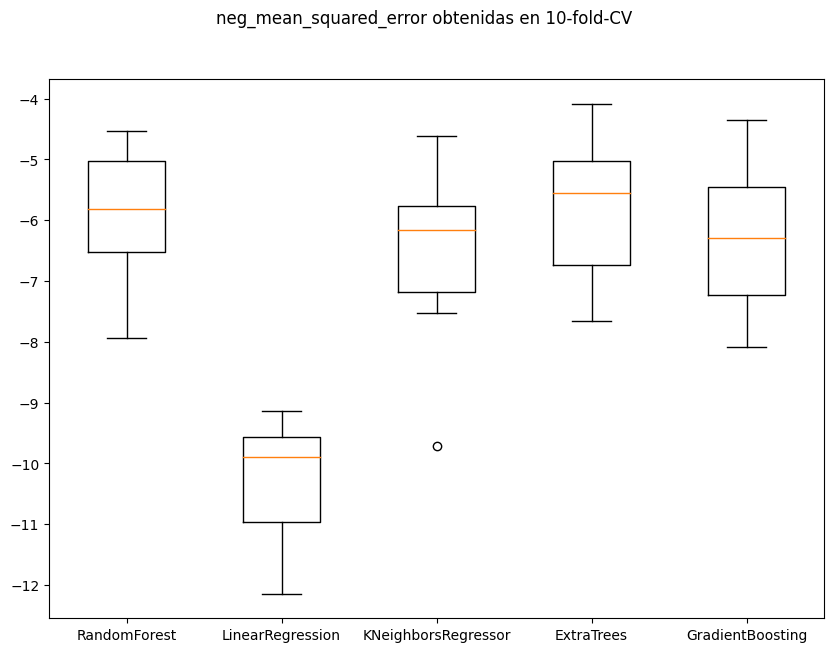

In [ ]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('neg_mean_squared_error obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Modelo Candidato 1

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = dict(max_depth=np.array([5,10,20,30,40,50,100,None]),
                      n_estimators=np.array([50,100,150, 500]))

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

model = RandomForestRegressor(random_state=seed)

# define el buscador grid en crosvalidacion
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# muestra resultados de la busqueda grid
print("Mejor neg_mean_squared_error: %f con hyperparametro %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor neg_mean_squared_error: -1.877257 con hyperparametro {'max_depth': 30, 'n_estimators': 500}
-3.284803 (0.438767) with: {'max_depth': 5, 'n_estimators': 50}
-3.262104 (0.435121) with: {'max_depth': 5, 'n_estimators': 100}
-3.255764 (0.433418) with: {'max_depth': 5, 'n_estimators': 150}
-3.255308 (0.423694) with: {'max_depth': 5, 'n_estimators': 500}
-2.019172 (0.420218) with: {'max_depth': 10, 'n_estimators': 50}
-2.017661 (0.414573) with: {'max_depth': 10, 'n_estimators': 100}
-2.014568 (0.411775) with: {'max_depth': 10, 'n_estimators': 150}
-2.013749 (0.399251) with: {'max_depth': 10, 'n_estimators': 500}
-1.895088 (0.446598) with: {'max_depth': 20, 'n_estimators': 50}
-1.890402 (0.436529) with: {'max_depth': 20, 'n_estimators': 100}
-1.885387 (0.433839) with: {'max_depth': 20, 'n_estimators': 150}
-1.877875 (0.427259) with: {'max_depth': 20, 'n_estimators': 500}
-1.901214 (0.448654) with: {'max_depth': 30, 'n_estimators': 50}
-1.895451 (0.436325) with: {'max_depth': 30, 'n_esti

In [ ]:
model1 = RandomForestRegressor(max_depth=30, n_estimators=500)
model1.fit(X_train, y_train)

y_predicted = model1.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted)**2)

Mean squared error: 1.6725227409778147
Mean absolute error: 0.9046199430099724
Explained variance score: 0.8747606631123239
R2 score: 0.7641534725290419


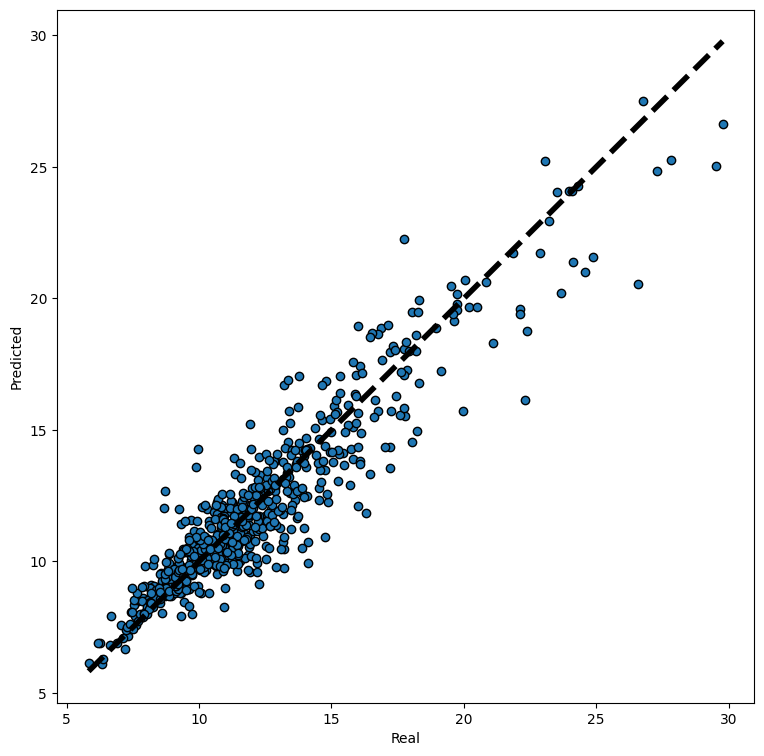

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

### Modelo Candidato 2

In [ ]:
from sklearn.model_selection import GridSearchCV

# define los valores que seran probados de los hiperparametros max_depth y n_estimators
parameter_grid = dict(max_depth=np.array([5,10,20,30,40,50,100,None]),
                      n_estimators=np.array([50,100,150, 500]))

# define los folds para la evaluacion de cada valor del hiperparametro n_estimators
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# define el tipo de modelo con el cual se testara diferentes hyperparametros
model = ExtraTreesRegressor(random_state=seed)

# define el buscador grid en crosvalidacion
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# muestra resultados de la busqueda grid
print("Mejor neg_mean_squared_error: %f con hyperparametro %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor neg_mean_squared_error: -5.749200 con hyperparametro {'max_depth': 20, 'n_estimators': 500}
-10.748916 (1.609748) with: {'max_depth': 5, 'n_estimators': 50}
-10.574588 (1.568049) with: {'max_depth': 5, 'n_estimators': 100}
-10.811542 (1.574496) with: {'max_depth': 5, 'n_estimators': 150}
-11.145004 (1.657772) with: {'max_depth': 5, 'n_estimators': 500}
-5.822836 (0.980846) with: {'max_depth': 10, 'n_estimators': 50}
-5.873914 (1.055145) with: {'max_depth': 10, 'n_estimators': 100}
-5.891893 (1.048026) with: {'max_depth': 10, 'n_estimators': 150}
-5.869661 (0.982650) with: {'max_depth': 10, 'n_estimators': 500}
-5.887556 (1.050985) with: {'max_depth': 20, 'n_estimators': 50}
-5.876517 (1.023886) with: {'max_depth': 20, 'n_estimators': 100}
-5.838323 (1.005287) with: {'max_depth': 20, 'n_estimators': 150}
-5.749200 (0.931946) with: {'max_depth': 20, 'n_estimators': 500}
-5.776523 (1.045227) with: {'max_depth': 30, 'n_estimators': 50}
-5.800495 (1.060233) with: {'max_depth': 30, 'n_

In [ ]:
# Reentrena modelo con ExtraTrees con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model2 = ExtraTreesRegressor(max_depth=20, n_estimators=500)
model2.fit(X_train, y_train)

# predice el target en el conjunto de validacion
y_predicted = model2.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted)**2)

Mean squared error: 3.572536024158084
Mean absolute error: 1.341866514966864
Explained variance score: 0.9271612704269467
R2 score: 0.8595224107887425


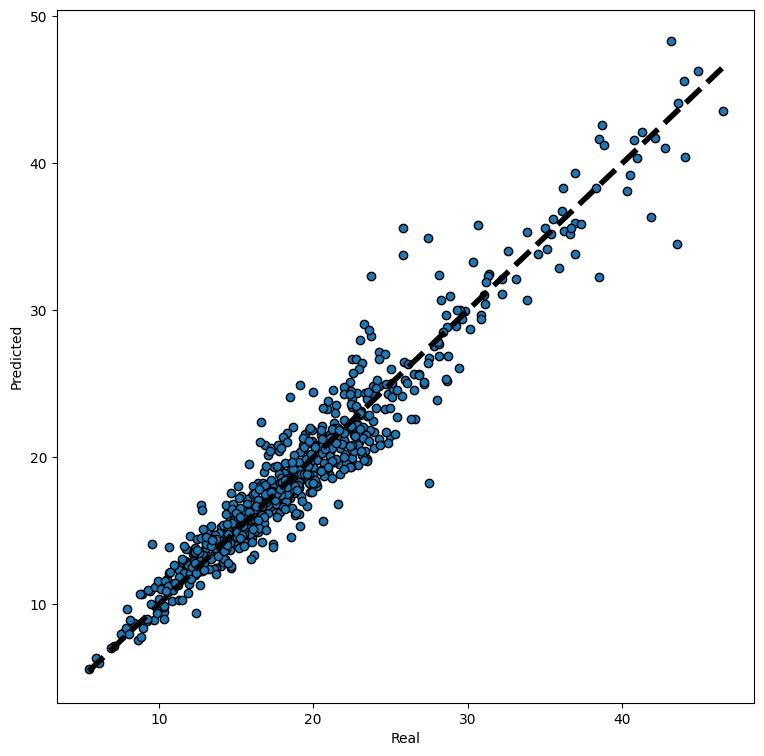

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
model_mejor = model2

In [ ]:
with open('modelo_base_q4.pkl', 'wb') as file:
    pickle.dump(model_mejor, file)

### PurpleAir

In [ ]:
array = df_p1.values
X = array[:,2:6]
y = array[:,1]

In [ ]:
test_size = 672/df_p1.shape[0]
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 3624 ejemplos. Validation: 672 ejemplos


In [ ]:
algos = []
algos.append(('RandomForest', RandomForestRegressor(n_estimators=100,n_jobs=-1 )))
algos.append(('LinearRegression', LinearRegression(n_jobs=-1 )))
algos.append(('KNeighborsRegressor', KNeighborsRegressor(n_jobs=-1 )))
algos.append(('SVR', SVR()))
algos.append(('GradientBoosting', GradientBoostingRegressor(n_estimators=100 )))

In [ ]:
# Evaluamos cada algoritmo de Ensamble en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

RandomForest: -1.2923027539421967 (0.19001953160702564)
LinearRegression: -1.9244213390615805 (0.21371624169036318)
KNeighborsRegressor: -1.3334572503253823 (0.20573079324100654)
SVR: -12.688602153830855 (1.746484382894301)
GradientBoosting: -1.4149102081998204 (0.2078942460148564)


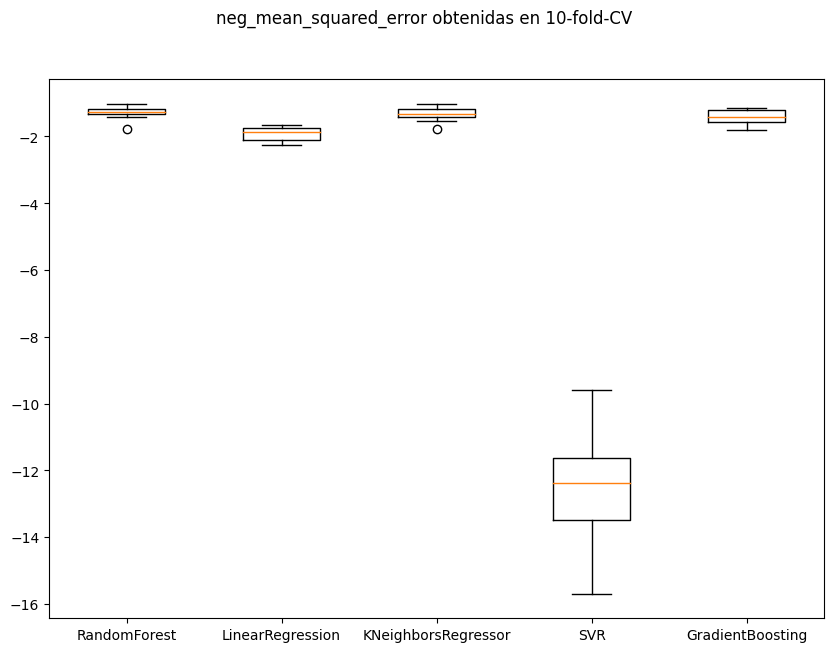

In [ ]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('neg_mean_squared_error obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = dict(max_depth=np.array([5,10,20,30,40,50,100,None]),
                      n_estimators=np.array([50,100,150, 500]))

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

model = RandomForestRegressor(random_state=seed)

# define el buscador grid en crosvalidacion
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# muestra resultados de la busqueda grid
print("Mejor neg_mean_squared_error: %f con hyperparametro %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor neg_mean_squared_error: -1.288345 con hyperparametro {'max_depth': 30, 'n_estimators': 500}
-1.544850 (0.166969) with: {'max_depth': 5, 'n_estimators': 50}
-1.545775 (0.171940) with: {'max_depth': 5, 'n_estimators': 100}
-1.546499 (0.171206) with: {'max_depth': 5, 'n_estimators': 150}
-1.551467 (0.182255) with: {'max_depth': 5, 'n_estimators': 500}
-1.305279 (0.185626) with: {'max_depth': 10, 'n_estimators': 50}
-1.301831 (0.180779) with: {'max_depth': 10, 'n_estimators': 100}
-1.297668 (0.181104) with: {'max_depth': 10, 'n_estimators': 150}
-1.294737 (0.190493) with: {'max_depth': 10, 'n_estimators': 500}
-1.302740 (0.198142) with: {'max_depth': 20, 'n_estimators': 50}
-1.298841 (0.187150) with: {'max_depth': 20, 'n_estimators': 100}
-1.294131 (0.183198) with: {'max_depth': 20, 'n_estimators': 150}
-1.288355 (0.190058) with: {'max_depth': 20, 'n_estimators': 500}
-1.305508 (0.190067) with: {'max_depth': 30, 'n_estimators': 50}
-1.298725 (0.182451) with: {'max_depth': 30, 'n_esti

In [ ]:
model2 = RandomForestRegressor(max_depth=30, n_estimators=500)
model2.fit(X_train, y_train)

y_iq1_predicted = model2.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_iq1_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_iq1_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_iq1_predicted))
print("R2 score:", r2_score(y_valid, y_iq1_predicted))

Mean squared error: 1.3782671653310885
Mean absolute error: 0.8493669968960598
Explained variance score: 0.897387293969521
R2 score: 0.8962986294584335


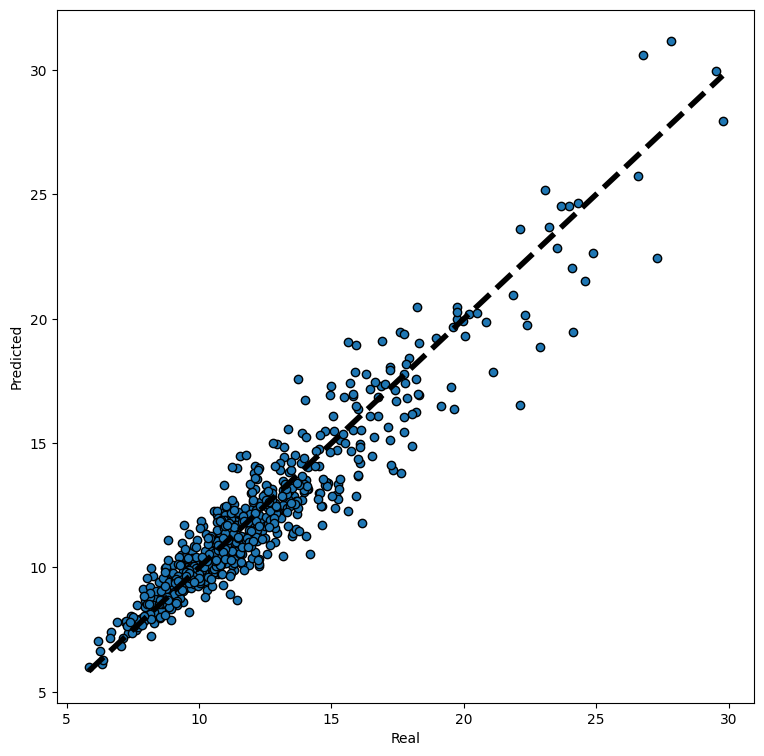

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y_iq1_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

### Qhawax

In [ ]:
array = df_q1.values
X = array[:,2:6]
y = array[:,1]

In [ ]:
test_size = 672/df_q1.shape[0]
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 3624 ejemplos. Validation: 672 ejemplos


In [ ]:
algos = []
algos.append(('RandomForest', RandomForestRegressor(n_estimators=100,n_jobs=-1 )))
algos.append(('LinearRegression', LinearRegression(n_jobs=-1 )))
algos.append(('KNeighborsRegressor', KNeighborsRegressor(n_jobs=-1 )))
algos.append(('SVR', SVR()))
algos.append(('GradientBoosting', GradientBoostingRegressor(n_estimators=100 )))

In [ ]:
# Evaluamos cada algoritmo de Ensamble en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

RandomForest: -1.9072934642993669 (0.4317488555724153)
LinearRegression: -4.12880394331003 (0.6233870085882655)
KNeighborsRegressor: -2.2580064223116336 (0.5441406351278641)
SVR: -11.994729491031686 (1.6542259477523684)
GradientBoosting: -2.2881744584170667 (0.39539857215451646)


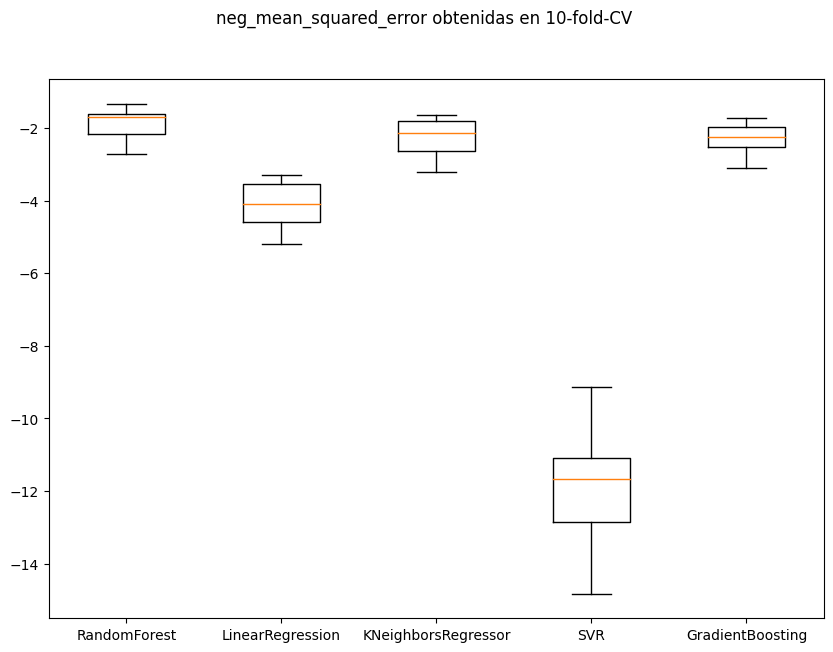

In [ ]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('neg_mean_squared_error obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = dict(max_depth=np.array([5,10,20,30,40,50,100,None]),
                      n_estimators=np.array([50,100,150, 500]))

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

model = RandomForestRegressor(random_state=seed)

# define el buscador grid en crosvalidacion
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# muestra resultados de la busqueda grid
print("Mejor neg_mean_squared_error: %f con hyperparametro %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor neg_mean_squared_error: -1.877257 con hyperparametro {'max_depth': 30, 'n_estimators': 500}
-3.284803 (0.438767) with: {'max_depth': 5, 'n_estimators': 50}
-3.262104 (0.435121) with: {'max_depth': 5, 'n_estimators': 100}
-3.255764 (0.433418) with: {'max_depth': 5, 'n_estimators': 150}
-3.255308 (0.423694) with: {'max_depth': 5, 'n_estimators': 500}
-2.019172 (0.420218) with: {'max_depth': 10, 'n_estimators': 50}
-2.017661 (0.414573) with: {'max_depth': 10, 'n_estimators': 100}
-2.014568 (0.411775) with: {'max_depth': 10, 'n_estimators': 150}
-2.013749 (0.399251) with: {'max_depth': 10, 'n_estimators': 500}
-1.895088 (0.446598) with: {'max_depth': 20, 'n_estimators': 50}
-1.890402 (0.436529) with: {'max_depth': 20, 'n_estimators': 100}
-1.885387 (0.433839) with: {'max_depth': 20, 'n_estimators': 150}
-1.877875 (0.427259) with: {'max_depth': 20, 'n_estimators': 500}
-1.901214 (0.448654) with: {'max_depth': 30, 'n_estimators': 50}
-1.895451 (0.436325) with: {'max_depth': 30, 'n_esti

In [ ]:
model3 = RandomForestRegressor(max_depth=30, n_estimators=500)
model3.fit(X_train, y_train)

y_iq1_predicted = model3.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_iq1_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_iq1_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_iq1_predicted))
print("R2 score:", r2_score(y_valid, y_iq1_predicted))

Mean squared error: 1.6856319046724506
Mean absolute error: 0.909478870907902
Explained variance score: 0.8738124388927645
R2 score: 0.873172384034025


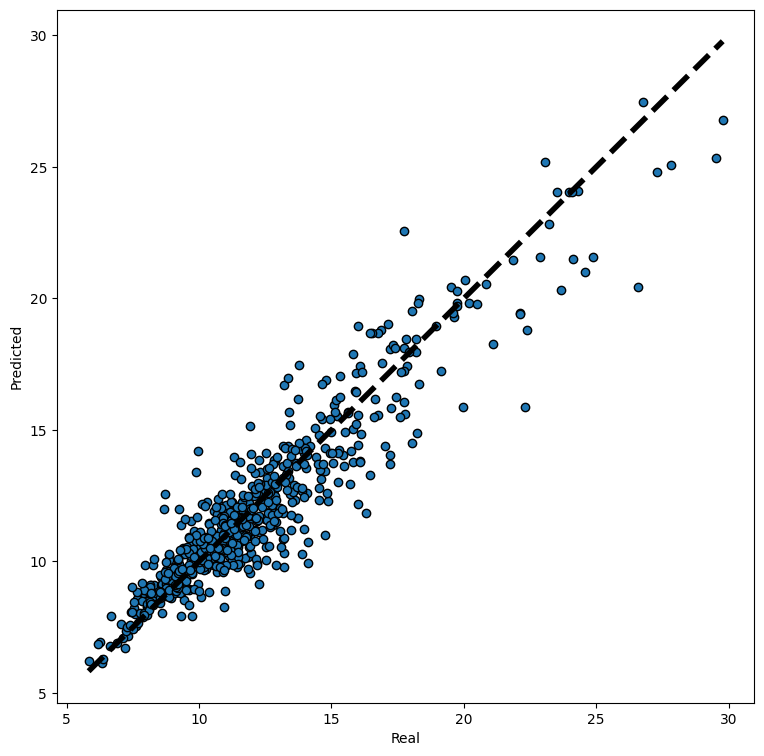

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y_iq1_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

### Transferibilidad Espacial

IQAir

In [ ]:
df_iq1_a = pd.read_csv('iq1_final_a.csv',sep=',')

In [ ]:
df_iq1_a

,Datetime,Teledyne_pm2.5,Pm2.5,Temp,Humedad,Presion
0,2024-01-23 16:45:00,15.719623,16.291667,16.300000,82.916667,767.069167
1,2024-01-23 17:00:00,17.208924,17.666667,17.733333,75.000000,767.100000
2,2024-01-23 17:15:00,19.292011,14.750000,18.550000,70.250000,767.210000
3,2024-01-23 17:30:00,19.819626,16.611111,18.866667,69.666667,767.294444
4,2024-01-23 17:45:00,20.973705,17.166667,18.500000,70.333333,767.520000
...,...,...,...,...,...,...
3517,2024-03-08 09:30:00,16.432546,14.800000,24.500000,48.666667,768.847333
3518,2024-03-08 09:45:00,19.465714,17.700000,25.100000,46.000000,768.763333
3519,2024-03-08 10:00:00,17.076917,12.600000,25.606667,42.200000,768.622000
3520,2024-03-08 10:15:00,14.772531,12.966667,26.346667,40.333333,768.455333


In [ ]:
with open('modelo_base_iq1.pkl', 'rb') as file:
  model1 = pickle.load(file)

In [ ]:
with open('modelo_base_iq1.pkl', 'rb') as file:
  model1 = pickle.load(file)

with open('modelo_base_iq2.pkl', 'rb') as file:
  model2 = pickle.load(file)

with open('modelo_base_iq3.pkl', 'rb') as file:
  model3 = pickle.load(file)

with open('modelo_base_p1.pkl', 'rb') as file:
  model4 = pickle.load(file)

with open('modelo_base_p2.pkl', 'rb') as file:
  model5 = pickle.load(file)

with open('modelo_base_p3.pkl', 'rb') as file:
  model6 = pickle.load(file)

with open('modelo_base_p4.pkl', 'rb') as file:
  model7 = pickle.load(file)

with open('modelo_base_q1.pkl', 'rb') as file:
  model8 = pickle.load(file)

with open('modelo_base_q2.pkl', 'rb') as file:
  model9 = pickle.load(file)

with open('modelo_base_q3.pkl', 'rb') as file:
  model10 = pickle.load(file)

with open('modelo_base_q4.pkl', 'rb') as file:
  model11 = pickle.load(file)


In [ ]:
array = df_iq1_a.values
X = array[:,2:6]
y = array[:,1]

In [ ]:
y1_predicted = model1.predict(X)
y2_predicted = model2.predict(X)
y3_predicted = model3.predict(X)
y4_predicted = model4.predict(X)
y5_predicted = model5.predict(X)
y6_predicted = model6.predict(X)
y7_predicted = model7.predict(X)
y8_predicted = model8.predict(X)
y9_predicted = model9.predict(X)
y10_predicted = model10.predict(X)
y11_predicted = model11.predict(X)

In [ ]:
#y_promedio = (y1_predicted + y2_predicted + y3_predicted + y4_predicted + y5_predicted
#              + y6_predicted + y7_predicted + y8_predicted + y9_predicted + y10_predicted
#              + y11_predicted)/11
y_promedio = (y1_predicted + y2_predicted + y3_predicted)/3

In [ ]:
y_promedio_2d = y_promedio.reshape(-1, 1)

In [ ]:
X = np.hstack((X, y_promedio_2d))

In [ ]:
test_size = 672/df_iq1_a.shape[0]
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 2850 ejemplos. Validation: 672 ejemplos


In [ ]:
y1_predicted = model1.predict(X_valid)

In [ ]:
#print("Mean squared error:", mean_squared_error(y_valid, X_valid[:,0]))
#print("R2 score:", r2_score(y_valid, X_valid[:,0])**2)
print("Mean squared error:", mean_squared_error(y_valid, y1_predicted))
print("R2 score:", r2_score(y_valid, y1_predicted)**2)

Mean squared error: 31.452425508704334
R2 score: 0.12832880110799513


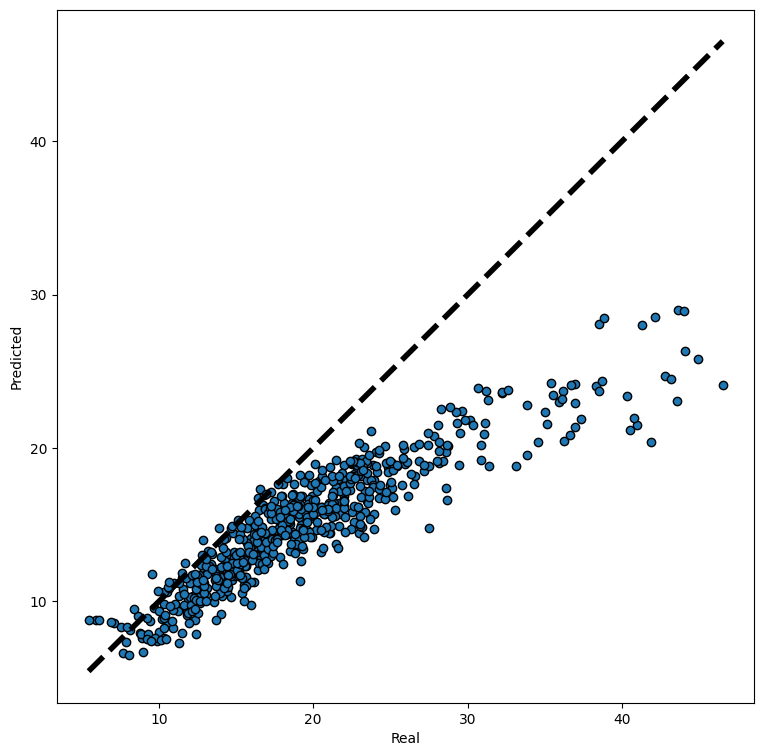

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y1_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# define los valores que seran probados de los hiperparametros max_depth y n_estimators
parameter_grid = dict(max_depth=np.array([5,10,20,30,40,50,100,None]),
                      n_estimators=np.array([50,100,150, 500]))

# define los folds para la evaluacion de cada valor del hiperparametro n_estimators
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# define el tipo de modelo con el cual se testara diferentes hyperparametros
model = ExtraTreesRegressor(random_state=seed)

# define el buscador grid en crosvalidacion
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# muestra resultados de la busqueda grid
print("Mejor neg_mean_squared_error: %f con hyperparametro %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor neg_mean_squared_error: -5.894444 con hyperparametro {'max_depth': 20, 'n_estimators': 500}
-7.632401 (1.064421) with: {'max_depth': 5, 'n_estimators': 50}
-7.539516 (0.999389) with: {'max_depth': 5, 'n_estimators': 100}
-7.644248 (1.002792) with: {'max_depth': 5, 'n_estimators': 150}
-7.550652 (0.994164) with: {'max_depth': 5, 'n_estimators': 500}
-5.973071 (0.838421) with: {'max_depth': 10, 'n_estimators': 50}
-5.953060 (0.836160) with: {'max_depth': 10, 'n_estimators': 100}
-5.959431 (0.808474) with: {'max_depth': 10, 'n_estimators': 150}
-5.903243 (0.788273) with: {'max_depth': 10, 'n_estimators': 500}
-6.060818 (0.955206) with: {'max_depth': 20, 'n_estimators': 50}
-5.974423 (0.946142) with: {'max_depth': 20, 'n_estimators': 100}
-5.957192 (0.938358) with: {'max_depth': 20, 'n_estimators': 150}
-5.894444 (0.880344) with: {'max_depth': 20, 'n_estimators': 500}
-5.984138 (0.886302) with: {'max_depth': 30, 'n_estimators': 50}
-5.974906 (0.878114) with: {'max_depth': 30, 'n_esti

In [ ]:
model_cali = ExtraTreesRegressor(max_depth=20, n_estimators=500)
model_cali.fit(X_train, y_train)

y_iq1_predicted = model_cali.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_iq1_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_iq1_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_iq1_predicted))
print("R2 score:", r2_score(y_valid, y_iq1_predicted)**2)

Mean squared error: 3.8547524096538113
Mean absolute error: 1.3881334732660513
Explained variance score: 0.9213775986508653
R2 score: 0.84887815813812


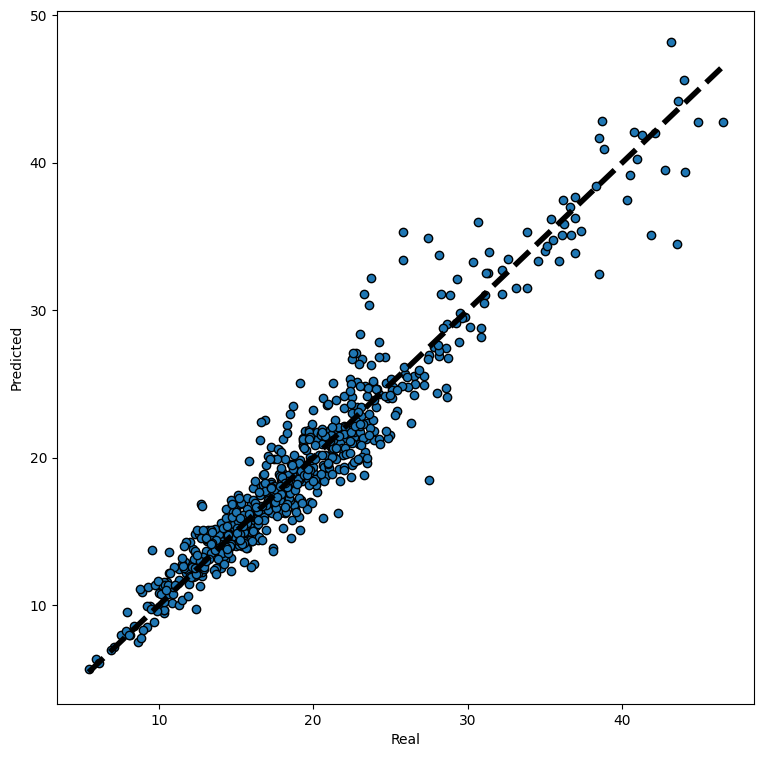

In [ ]:
fig, ax = plt.subplots(figsize=[9,9])
ax.scatter(y_valid, y_iq1_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
with open('modelo_cal_iq2_in_l_all.pkl', 'wb') as file:
    pickle.dump(model_cali, file)